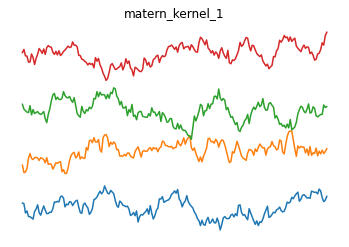

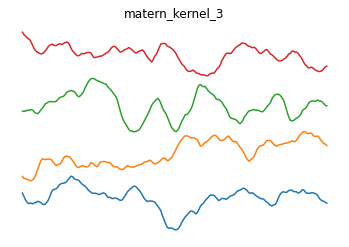

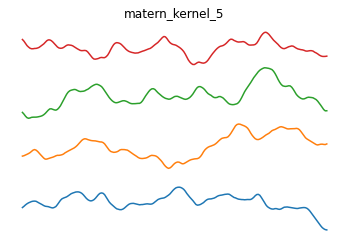

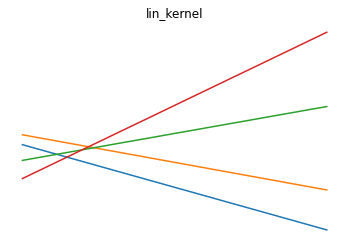

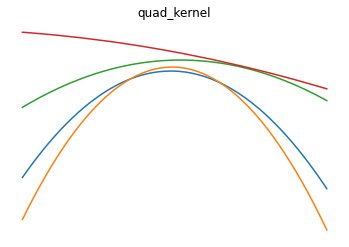

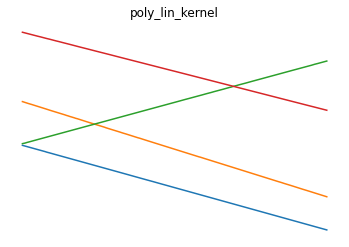

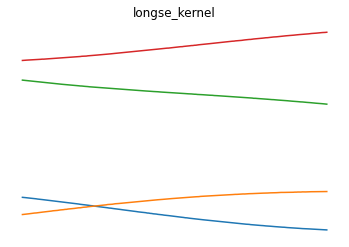

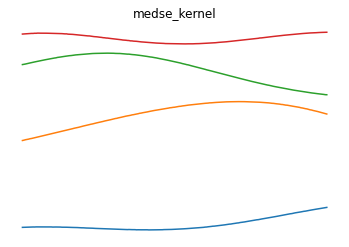

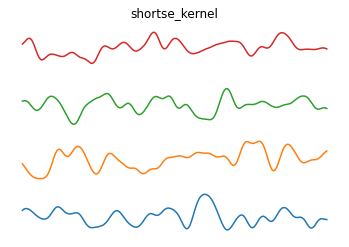

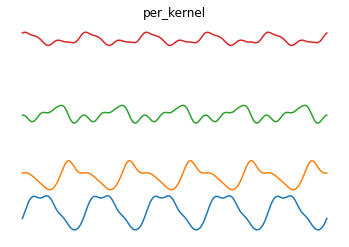

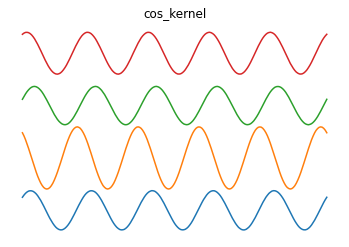

In [2]:
# import superimport

import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import transpose
from numpy.random import default_rng
from math import exp, sqrt, sin, pi, cos
# import pyprobml_utils as pml

def gpKernelPlot(seed):
    if seed == 1:
        return 
    
    X = np.array([1, 2, 3])
    X_t = np.atleast_2d(X).transpose()
    X = X_t * 2
    y = np.array([1, 2, 4])
    y = np.atleast_2d(y).transpose()
    y = y - np.mean(y)
    N = len(X)

    n_samples = 4
    n_xstar = 201
    x_range_1d = np.linspace(-10, 10, n_xstar).transpose()
    x_range = np.atleast_2d(np.linspace(-10, 10, n_xstar)).transpose()
    post_xrange = np.atleast_2d(np.linspace(-3, 10, n_xstar)).transpose()
    x0 = 1
    numerical_noise = 1e-5
    model_noise = 2

    se_length_scale = 2.5
    se_output_var = 2

    se_kernel = lambda x, y: se_output_var*(np.exp(-0.5 * ((x - y) ** 2) / se_length_scale**2))
    
    lin_output_var = 0.5
    lin_kernel = lambda x, y: lin_output_var*((x + 1) * (y + 1))
    poly_lin_kernel = lambda x, y: lin_output_var*(1 + x * y)

    quad_output_var = 0.5
    quad_kernel = lambda x, y: quad_output_var*((1 + x * y) ** 2)
    
    s2f = 1
    f1 = lambda t: 1
    f3 = lambda t: 1 + t
    f5 = lambda t: 1 + t * (1 + t/3)
    m = lambda t, f: f(t) * np.exp(-1 * t)

    matern_kernel_1 = lambda x, y: m(sqrt(1) * abs(x - y), f1)
    matern_kernel_3 = lambda x, y: m(sqrt(3) * abs(x - y), f3)
    matern_kernel_5 = lambda x, y: m(sqrt(5) * abs(x - y), f5)
    
    longse_length_scale = 20
    longse_output_var = 10
    longse_kernel = lambda x, y: longse_output_var*(np.exp(-0.5 * ((x - y) ** 2) / longse_length_scale**2))

    shortse_length_scale = 0.5
    shortse_output_var = 0.5
    shortse_kernel = lambda x, y: shortse_output_var*(np.exp(-0.5 * ((x - y) ** 2) / shortse_length_scale**2))

    medse_length_scale = 10
    medse_output_var = 5
    medse_kernel = lambda x, y: medse_output_var*(np.exp(-0.5 * ((x - y) ** 2) / medse_length_scale**2))

    per_length_scale = 1
    per_period = 4
    per_output_var = 1.1
    per_kernel = lambda x, y: per_output_var*(np.exp(-2 * (np.sin(pi * (x - y) / per_period)**2) / per_length_scale**2))

    cos_period = 4
    cos_output_var = 1.1
    cos_kernel = lambda x, y: cos_output_var*(np.cos(2 * pi * (x - y) / cos_period))

    wn_output_var = 1.1
    wn_kernel = lambda x, y: wn_output_var*(1.00 if x == y else 0.00)

    rq_length_scale = 2.5;
    rq_outout_var = 2;
    rq_alpha = 1.1;
    rq_kernel = lambda x, y: rq_outout_var*(1 + (x - y) ** 2 / (2 * rq_alpha * rq_length_scale**2))**(-1 * rq_alpha);

    c_kernel = lambda x, y: np.ones(np.shape(x * y));

    se_plus_lin = lambda x, y: se_kernel(x, y) + lin_kernel(x, y);
    se_plus_per = lambda x, y: se_kernel(x, y) + per_kernel(x, y);
    se_times_lin = lambda x, y: se_kernel(x, y) * lin_kernel(x, y);
    se_times_per = lambda x, y: se_kernel(x, y) * per_kernel(x, y);
    lin_times_per = lambda x, y: lin_kernel(x, y) * per_kernel(x, y);
    lin_plus_per = lambda x, y: lin_kernel(x, y) + per_kernel(x, y);
    lin_times_lin = lambda x, y: lin_kernel(x, y) * lin_kernel(x, y);
    longse_times_per = lambda x, y: longse_kernel(x, y) * per_kernel(x, y);
    longse_plus_per = lambda x, y: longse_kernel(x, y) + per_kernel(x, y);
    longse_times_lin = lambda x, y: longse_kernel(x, y) * lin_kernel(x, y);
    longse_plus_se = lambda x, y: longse_kernel(x, y) + se_kernel(x, y);
    shortse_plus_medse = lambda x, y: shortse_kernel(x, y) + medse_kernel(x, y);

    kernel_names = {'matern_kernel_1': matern_kernel_1, 'matern_kernel_3': matern_kernel_3, 'matern_kernel_5': matern_kernel_5, 
                    'lin_kernel': lin_kernel, 'quad_kernel': quad_kernel, 'poly_lin_kernel': poly_lin_kernel,
                    'longse_kernel': longse_kernel, 'medse_kernel': medse_kernel, 'shortse_kernel': shortse_kernel,
                    'per_kernel': per_kernel, 'cos_kernel': cos_kernel}

    color_ixs = np.tile(10, (1, len(kernel_names)))

    x_range_transpose = np.atleast_2d(x_range).transpose()

    for k in kernel_names:
        K = kernel_names[k](x_range_transpose, x_range)
        K = K + np.eye(n_xstar) * numerical_noise
        samples = default_rng().multivariate_normal(np.zeros(np.shape(x_range_1d)), K, n_samples)
        samples = np.atleast_2d(samples).transpose()
        samples = samples + np.tile(np.arange(1, n_samples + 1, 1) * 5 - 10, (n_xstar, 1))
        
        plt.plot(x_range_1d, samples)
        plt.title(k, fontsize=12)
        plt.axis('off')
#         pml.savefig(f'gp_plot_{k}.pdf')
        plt.show()
        

gpKernelPlot(2)

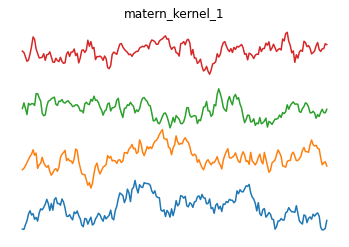

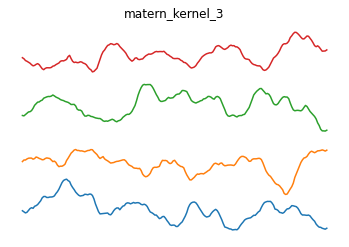

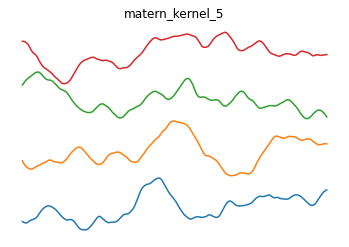

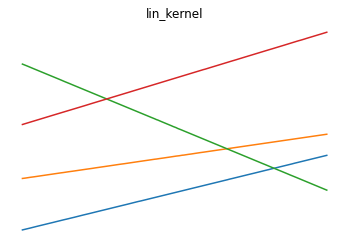

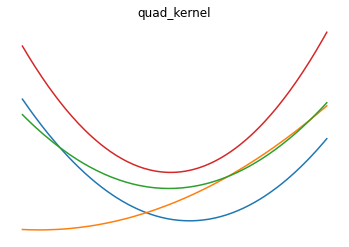

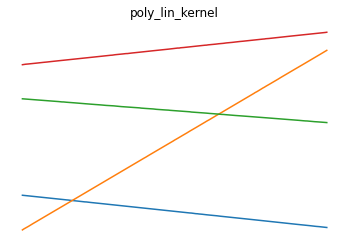

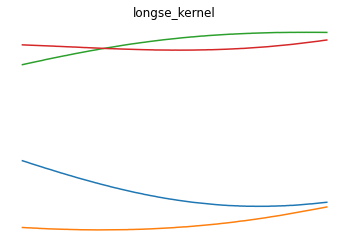

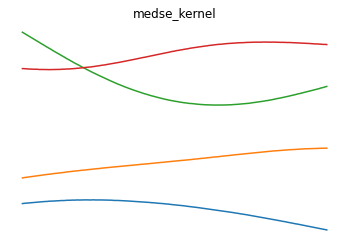

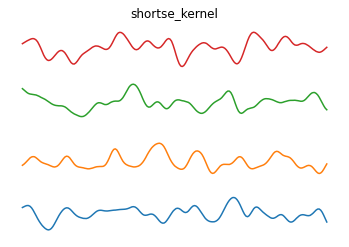

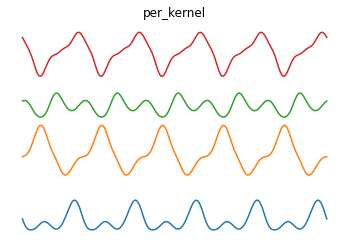

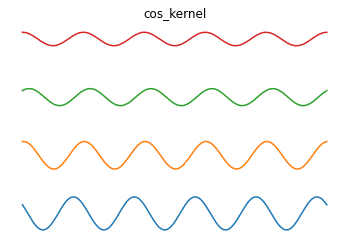

In [7]:
X = np.array([1, 2, 3])
X_t = np.atleast_2d(X).transpose()
X = X_t * 2
y = np.array([1, 2, 4])
y = np.atleast_2d(y).transpose()
y = y - np.mean(y)
N = len(X)

n_samples = 4
n_xstar = 201
x_range_1d = np.linspace(-10, 10, n_xstar).transpose()
x_range = np.atleast_2d(np.linspace(-10, 10, n_xstar)).transpose()
post_xrange = np.atleast_2d(np.linspace(-3, 10, n_xstar)).transpose()
x0 = 1
numerical_noise = 1e-5
model_noise = 2

se_length_scale = 2.5
se_output_var = 2

se_kernel = lambda x, y: se_output_var*(np.exp(-0.5 * ((x - y) ** 2) / se_length_scale**2))

lin_output_var = 0.5
lin_kernel = lambda x, y: lin_output_var*((x + 1) * (y + 1))
poly_lin_kernel = lambda x, y: lin_output_var*(1 + x * y)

quad_output_var = 0.5
quad_kernel = lambda x, y: quad_output_var*((1 + x * y) ** 2)

s2f = 1
f1 = lambda t: 1
f3 = lambda t: 1 + t
f5 = lambda t: 1 + t * (1 + t/3)
m = lambda t, f: f(t) * np.exp(-1 * t)

matern_kernel_1 = lambda x, y: m(sqrt(1) * abs(x - y), f1)
matern_kernel_3 = lambda x, y: m(sqrt(3) * abs(x - y), f3)
matern_kernel_5 = lambda x, y: m(sqrt(5) * abs(x - y), f5)

longse_length_scale = 20
longse_output_var = 10
longse_kernel = lambda x, y: longse_output_var*(np.exp(-0.5 * ((x - y) ** 2) / longse_length_scale**2))

shortse_length_scale = 0.5
shortse_output_var = 0.5
shortse_kernel = lambda x, y: shortse_output_var*(np.exp(-0.5 * ((x - y) ** 2) / shortse_length_scale**2))

medse_length_scale = 10
medse_output_var = 5
medse_kernel = lambda x, y: medse_output_var*(np.exp(-0.5 * ((x - y) ** 2) / medse_length_scale**2))

per_length_scale = 1
per_period = 4
per_output_var = 1.1
per_kernel = lambda x, y: per_output_var*(np.exp(-2 * (np.sin(pi * (x - y) / per_period)**2) / per_length_scale**2))

cos_period = 4
cos_output_var = 1.1
cos_kernel = lambda x, y: cos_output_var*(np.cos(2 * pi * (x - y) / cos_period))

wn_output_var = 1.1
wn_kernel = lambda x, y: wn_output_var*(1.00 if x == y else 0.00)

rq_length_scale = 2.5;
rq_outout_var = 2;
rq_alpha = 1.1;
rq_kernel = lambda x, y: rq_outout_var*(1 + (x - y) ** 2 / (2 * rq_alpha * rq_length_scale**2))**(-1 * rq_alpha);

c_kernel = lambda x, y: np.ones(np.shape(x * y));

se_plus_lin = lambda x, y: se_kernel(x, y) + lin_kernel(x, y);
se_plus_per = lambda x, y: se_kernel(x, y) + per_kernel(x, y);
se_times_lin = lambda x, y: se_kernel(x, y) * lin_kernel(x, y);
se_times_per = lambda x, y: se_kernel(x, y) * per_kernel(x, y);
lin_times_per = lambda x, y: lin_kernel(x, y) * per_kernel(x, y);
lin_plus_per = lambda x, y: lin_kernel(x, y) + per_kernel(x, y);
lin_times_lin = lambda x, y: lin_kernel(x, y) * lin_kernel(x, y);
longse_times_per = lambda x, y: longse_kernel(x, y) * per_kernel(x, y);
longse_plus_per = lambda x, y: longse_kernel(x, y) + per_kernel(x, y);
longse_times_lin = lambda x, y: longse_kernel(x, y) * lin_kernel(x, y);
longse_plus_se = lambda x, y: longse_kernel(x, y) + se_kernel(x, y);
shortse_plus_medse = lambda x, y: shortse_kernel(x, y) + medse_kernel(x, y);

kernel_names = {'matern_kernel_1': matern_kernel_1, 'matern_kernel_3': matern_kernel_3, 'matern_kernel_5': matern_kernel_5, 
                'lin_kernel': lin_kernel, 'quad_kernel': quad_kernel, 'poly_lin_kernel': poly_lin_kernel,
                'longse_kernel': longse_kernel, 'medse_kernel': medse_kernel, 'shortse_kernel': shortse_kernel,
                'per_kernel': per_kernel, 'cos_kernel': cos_kernel}

color_ixs = np.tile(10, (1, len(kernel_names)))

x_range_transpose = np.atleast_2d(x_range).transpose()

for k in kernel_names:
    K = kernel_names[k](x_range_transpose, x_range)
    K = K + np.eye(n_xstar) * numerical_noise
    samples = default_rng().multivariate_normal(np.zeros(np.shape(x_range_1d)), K, n_samples)
    samples = np.atleast_2d(samples).transpose()
    samples = samples + np.tile(np.arange(1, n_samples + 1, 1) * 5 - 10, (n_xstar, 1))

    plt.plot(x_range_1d, samples)
    plt.title(k, fontsize=12)
    plt.axis('off')
#         pml.savefig(f'gp_plot_{k}.pdf')
    plt.show()
